In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
books=pd.read_csv(r"D:\BOOK RECOMMENDATION PROJECT\Books.csv",encoding="latin-1")
users = pd.read_csv(r"D:\BOOK RECOMMENDATION PROJECT\Users.csv",on_bad_lines='skip',encoding='latin-1')
ratings=pd.read_csv(r"D:\BOOK RECOMMENDATION PROJECT\Ratings.csv",encoding='latin-1')

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [6]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278674, 3)
(1149780, 3)


In [7]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [8]:
users.isna().sum()

User-ID          0
Location         0
Age         110715
dtype: int64

In [9]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    8
dtype: int64

In [10]:
books.duplicated().sum()

0

In [11]:
users.duplicated().sum()

0

In [12]:
ratings.duplicated().sum()

0

In [13]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [14]:
books.dropna(inplace=True)

In [15]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [16]:
books.loc[(books['Year-Of-Publication']=='DK Publishing Inc') | (books['Year-Of-Publication']=='Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [17]:
books.drop(books[books['Year-Of-Publication']=='DK Publishing Inc'].index,inplace=True)
books.drop(books[books['Year-Of-Publication']=='Gallimard'].index,inplace=True)

In [18]:
books.loc[(books['Year-Of-Publication'] == 0)] = np.nan

In [19]:
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

In [20]:
books['Year-Of-Publication'].fillna((books['Year-Of-Publication'].mean()),inplace=True)

In [21]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int).astype(str)

In [22]:
books['Year-Of-Publication'].value_counts()[0:10]

Year-Of-Publication
2002    17626
1999    17430
2001    17358
2000    17232
1998    15766
1997    14890
2003    14358
1996    14030
1995    13545
1994    11796
Name: count, dtype: int64

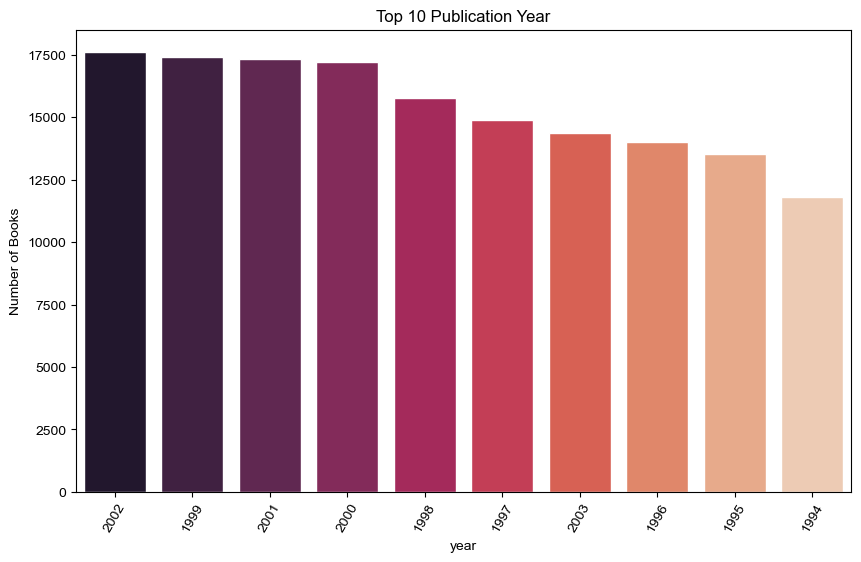

In [23]:
plt.subplots(figsize=(10,6))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = books['Year-Of-Publication'].value_counts()[:10].index,y = books['Year-Of-Publication'].value_counts()[:10].values,
            palette = 'rocket').set(title = 'Top 10 Publication Year',xlabel = 'year',ylabel = 'Number of Books')
plt.xticks(rotation = 60)
plt.show()

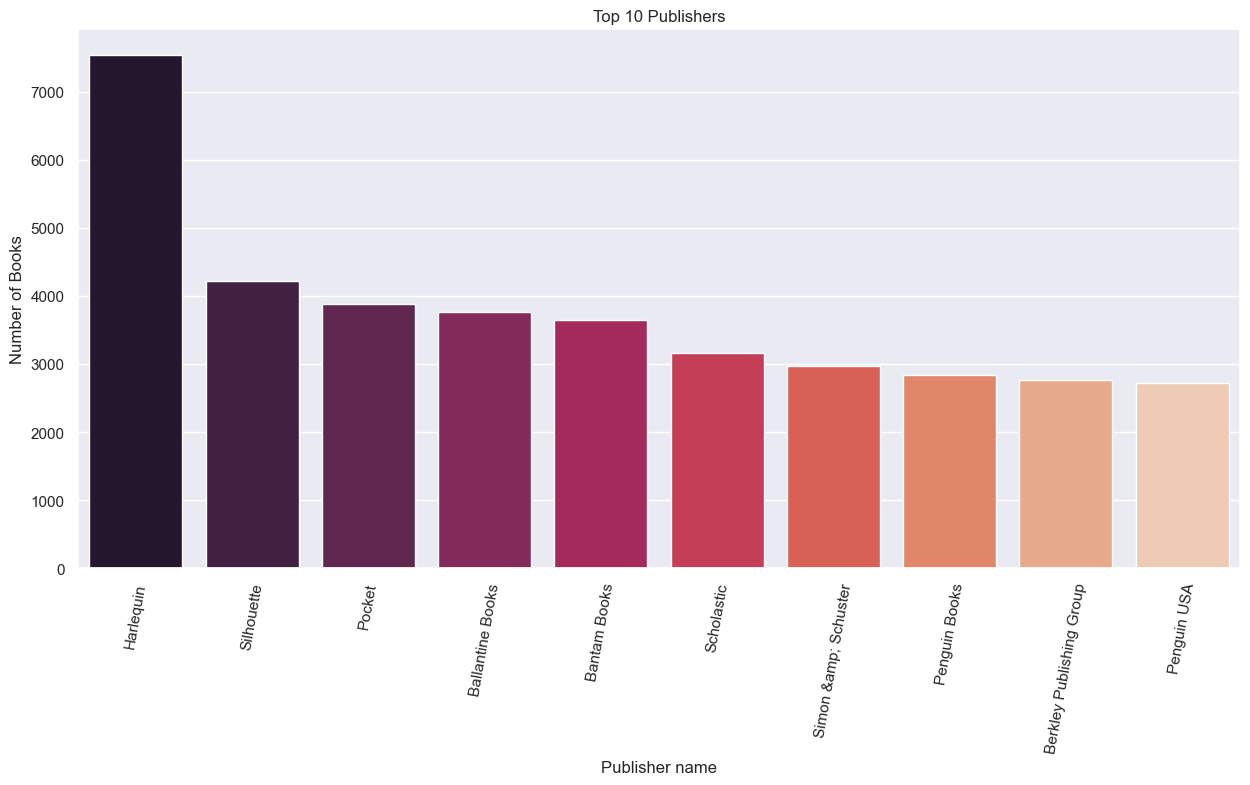

In [24]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = books['Publisher'].value_counts()[:10].index,y = books['Publisher'].value_counts()[:10].values,
            palette = 'rocket').set(title = 'Top 10 Publishers',xlabel = 'Publisher name',ylabel = 'Number of Books')
plt.xticks(rotation = 80)
plt.show()

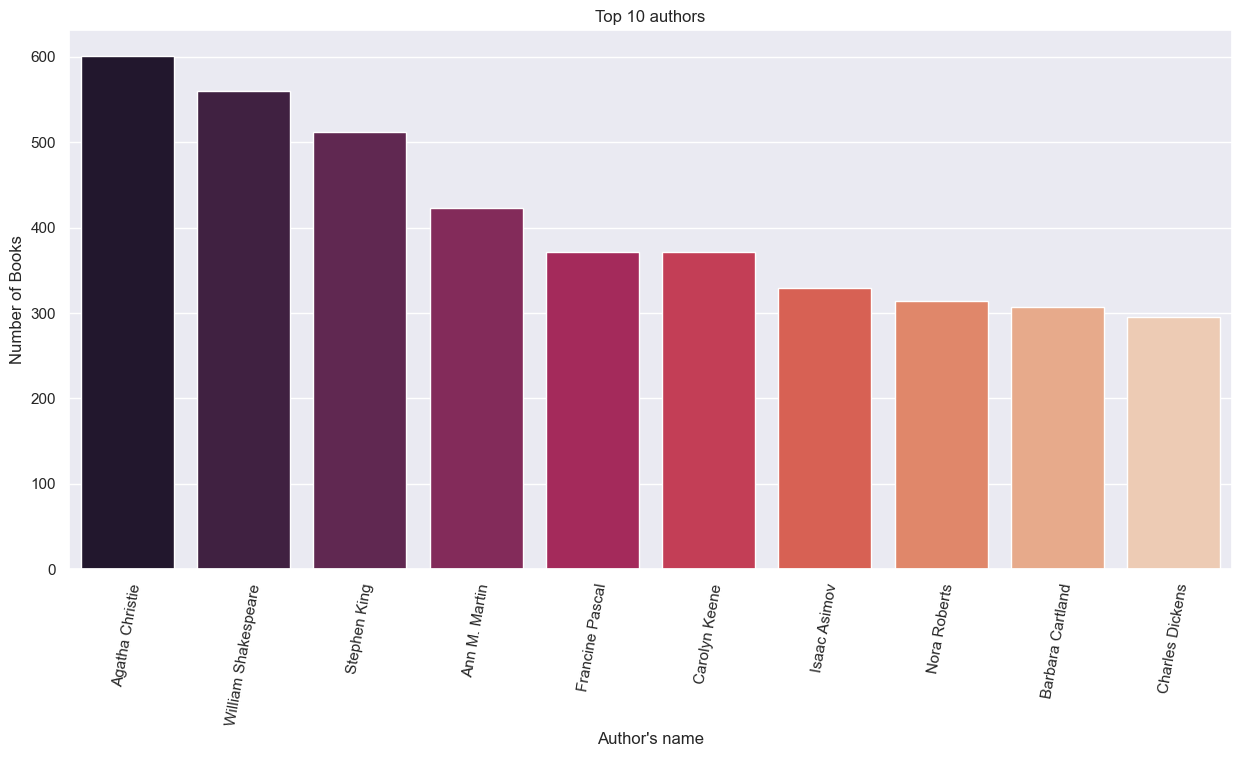

In [25]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = books['Book-Author'].value_counts()[:10].index,y = books['Book-Author'].value_counts()[:10].values,
            palette = 'rocket').set(title = 'Top 10 authors',xlabel = "Author's name",ylabel = 'Number of Books')
plt.xticks(rotation = 80)
plt.show()

In [26]:
books['Image-URL-M'] = books['Image-URL-M'].str.replace('http://', 'https://')

In [27]:
users.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

In [28]:
users['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [29]:
users.loc[(users['Age']<5) | (users['Age']>90),'Age'] = np.nan

In [30]:
users['Age'].fillna((users['Age'].mean()),inplace=True)

In [31]:
users['Age'].unique()

array([34.72756949, 18.        , 17.        , 61.        , 26.        ,
       14.        , 25.        , 19.        , 46.        , 55.        ,
       32.        , 24.        , 20.        , 34.        , 23.        ,
       51.        , 31.        , 21.        , 44.        , 30.        ,
       57.        , 43.        , 37.        , 41.        , 54.        ,
       42.        , 50.        , 39.        , 53.        , 47.        ,
       36.        , 28.        , 35.        , 13.        , 58.        ,
       49.        , 38.        , 45.        , 62.        , 63.        ,
       27.        , 33.        , 29.        , 66.        , 40.        ,
       15.        , 60.        , 79.        , 22.        , 16.        ,
       65.        , 59.        , 48.        , 72.        , 56.        ,
       67.        , 80.        , 52.        , 69.        , 71.        ,
       73.        , 78.        ,  9.        , 64.        , 12.        ,
       74.        , 75.        , 76.        , 83.        , 68.  

In [32]:
users['Age'] = users['Age'].astype('int')
users['Age']

0         34
1         18
2         34
3         17
4         34
          ..
278669    34
278670    50
278671    34
278672    34
278673    34
Name: Age, Length: 278674, dtype: int32

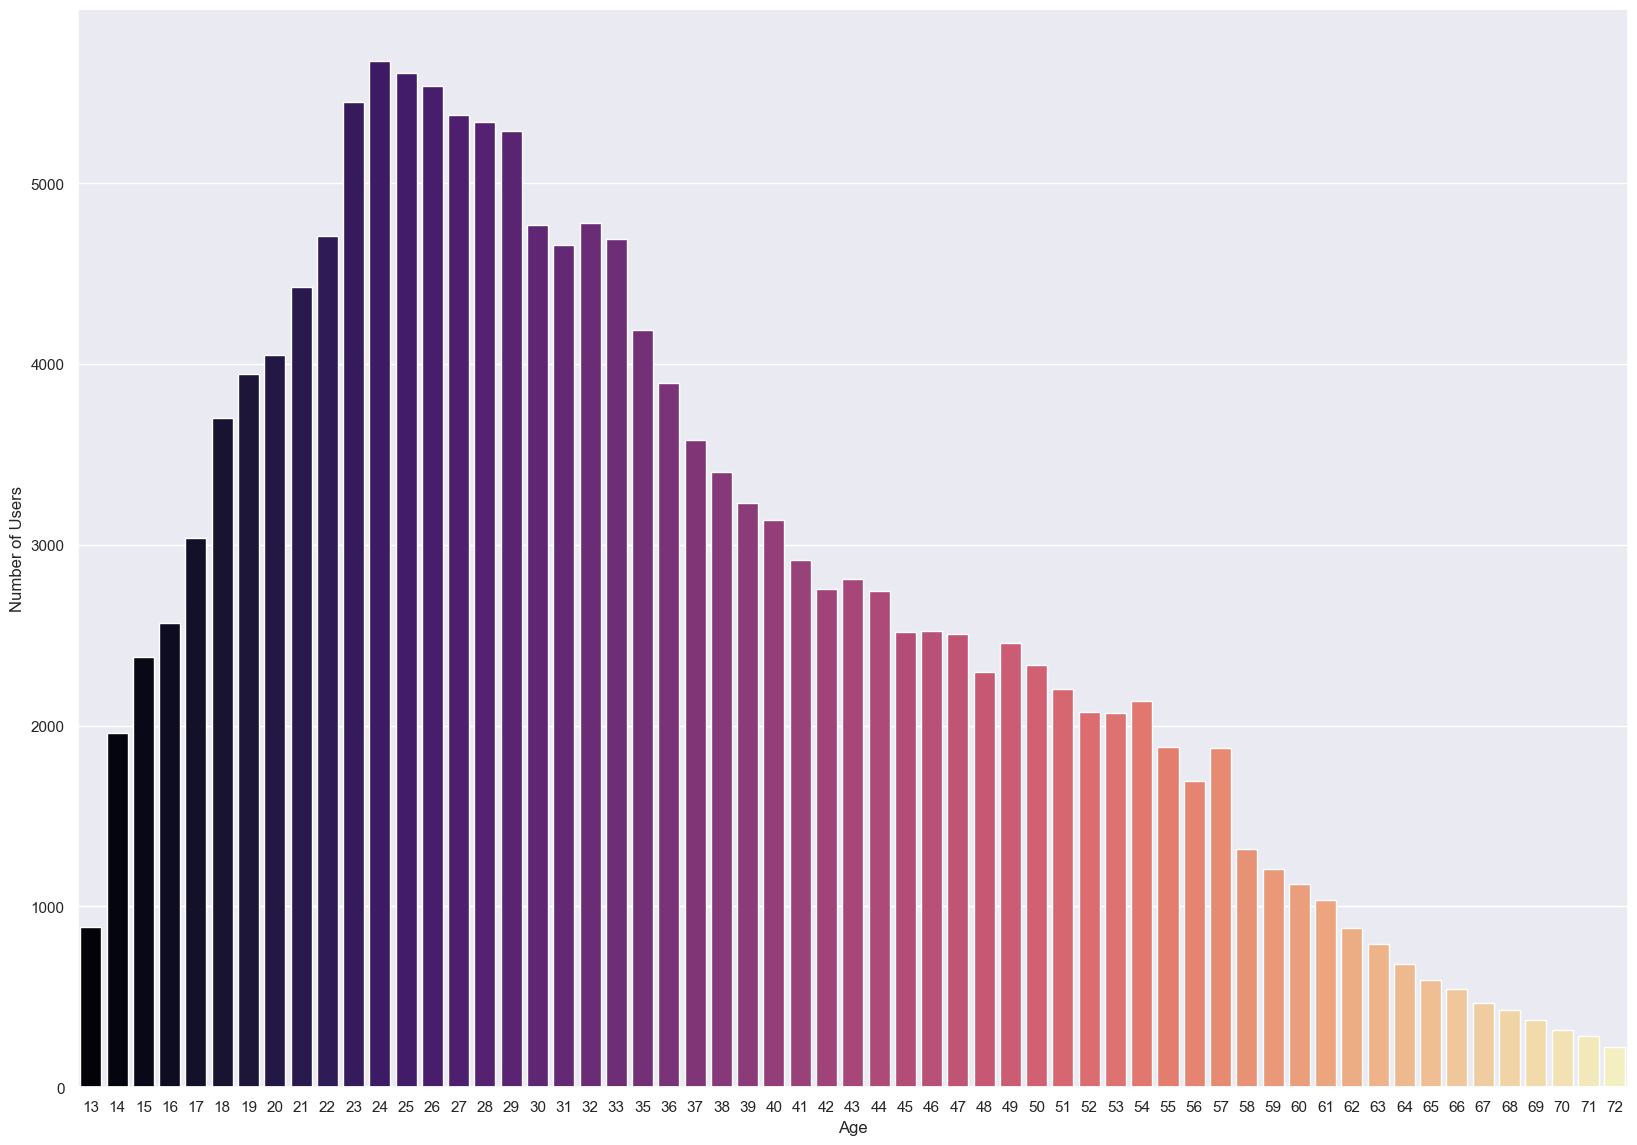

In [33]:
plt.subplots(figsize=(20,14))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = users['Age'].value_counts()[1:60].index,y = users['Age'].value_counts()[1:60].values,
            palette = 'magma').set(xlabel = "Age",ylabel = 'Number of Users')
plt.show()

In [34]:
ratings.dtypes

User-ID          int64
ISBN            object
Book-Rating    float64
dtype: object

In [35]:
ratings.dropna(inplace=True)

In [36]:
ratings['Book-Rating'].unique()

array([ 0.,  5.,  3.,  6.,  8.,  7., 10.,  9.,  4.,  1.,  2.])

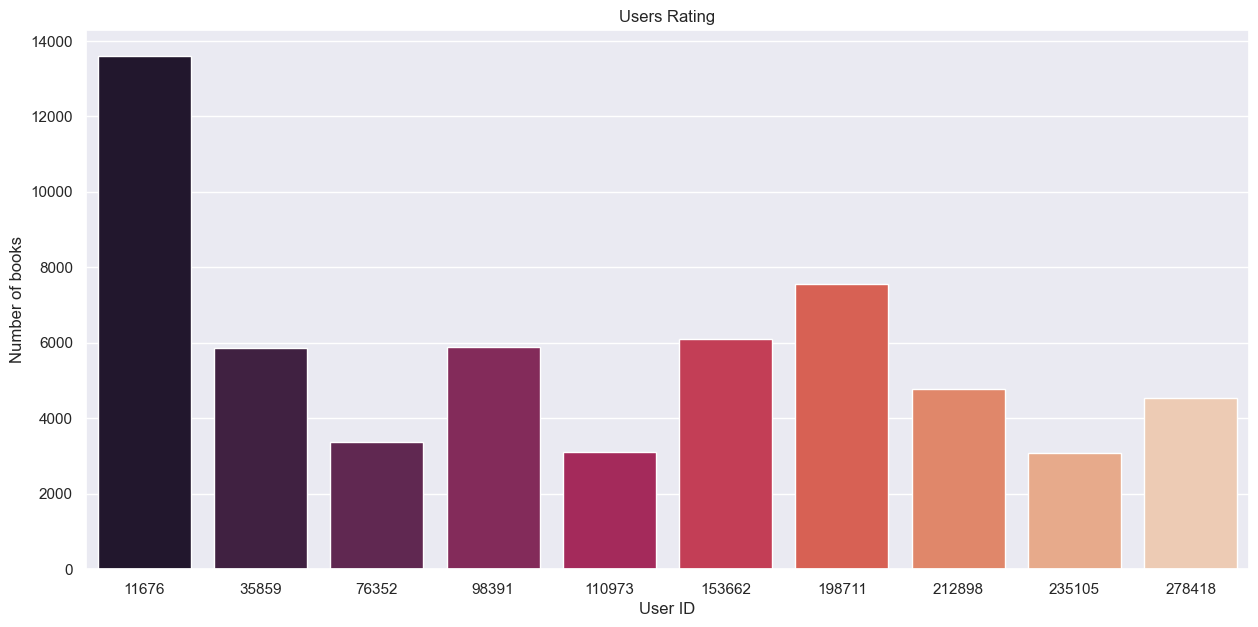

In [37]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = ratings['User-ID'].value_counts()[0:10].index,y = ratings['User-ID'].value_counts()[0:10].values,
            palette = 'rocket').set(title="Users Rating",xlabel = "User ID",ylabel = 'Number of books')
plt.show()

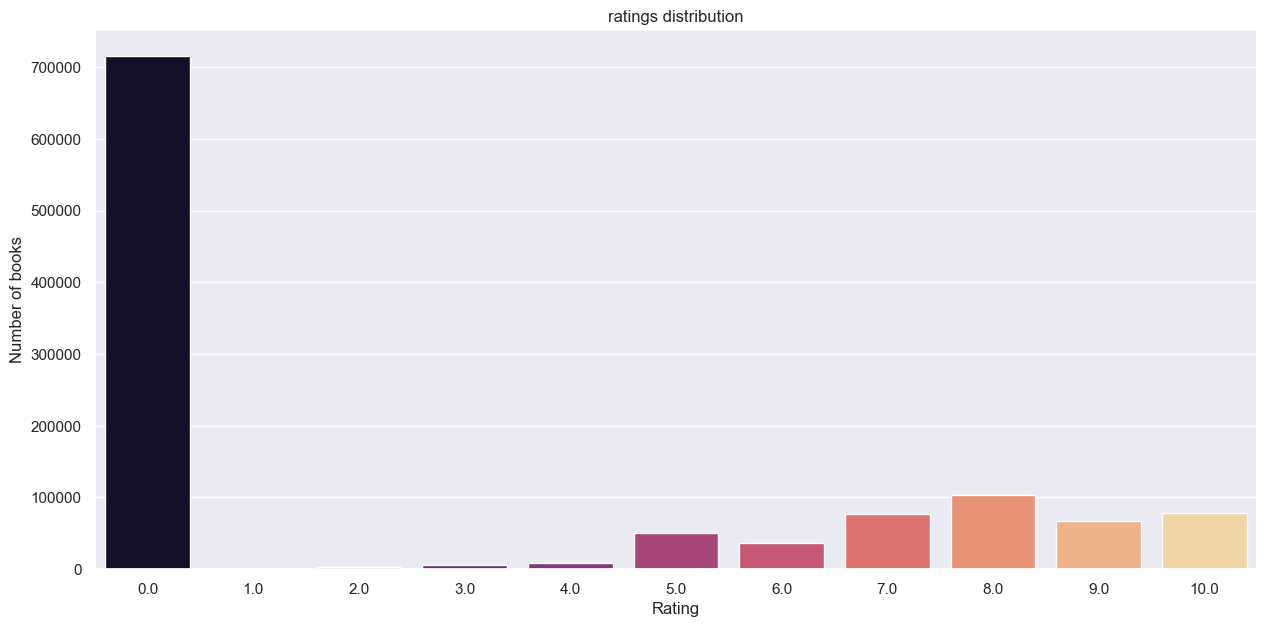

In [38]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = ratings['Book-Rating'].value_counts().index,y = ratings['Book-Rating'].value_counts().values,
            palette = 'magma').set(title="ratings distribution",xlabel = "Rating",ylabel = 'Number of books')
plt.show()

# Popularity Based Recommender System

In [39]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [40]:
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,https://images.amazon.com/images/P/034545104X....,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5.0,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,https://images.amazon.com/images/P/0155061224....,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0.0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,https://images.amazon.com/images/P/0446520802....,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3.0,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,https://images.amazon.com/images/P/052165615X....,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6.0,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,https://images.amazon.com/images/P/0521795028....,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1018379,276704,0876044011,0.0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,https://images.amazon.com/images/P/0876044011....,http://images.amazon.com/images/P/0876044011.0...
1018380,276704,1563526298,9.0,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,https://images.amazon.com/images/P/1563526298....,http://images.amazon.com/images/P/1563526298.0...
1018381,276706,0679447156,0.0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,https://images.amazon.com/images/P/0679447156....,http://images.amazon.com/images/P/0679447156.0...
1018382,276709,0515107662,10.0,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,https://images.amazon.com/images/P/0515107662....,http://images.amazon.com/images/P/0515107662.0...


In [41]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()

In [42]:
num_rating_df.rename(columns={'Book-Rating':'Num_Rating'},inplace=True)

In [43]:
num_rating_df

,Book-Title,Num_Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
238317,ÿ¿lpiraten.,2
238318,ÿ¿rger mit Produkt X. Roman.,4
238319,ÿ¿sterlich leben.,1
238320,ÿ¿stlich der Berge.,3


In [44]:
avg_rating_df = ratings_with_name.groupby('Book-Title').mean(numeric_only=True)['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'Avg_Rating'},inplace=True)

In [45]:
avg_rating_df

,Book-Title,Avg_Rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
238317,ÿ¿lpiraten.,0.000000
238318,ÿ¿rger mit Produkt X. Roman.,5.250000
238319,ÿ¿sterlich leben.,7.000000
238320,ÿ¿stlich der Berge.,2.666667


In [46]:
popularity_df = num_rating_df.merge(avg_rating_df,on='Book-Title')

In [47]:
popularity_df

,Book-Title,Num_Rating,Avg_Rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
238317,ÿ¿lpiraten.,2,0.000000
238318,ÿ¿rger mit Produkt X. Roman.,4,5.250000
238319,ÿ¿sterlich leben.,1,7.000000
238320,ÿ¿stlich der Berge.,3,2.666667


In [48]:
popular_df = popularity_df[popularity_df['Num_Rating']>=250].sort_values('Avg_Rating',ascending=False).head(50)

In [49]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','Num_Rating','Avg_Rating']]

In [50]:
popular_df

,Book-Title,Book-Author,Image-URL-M,Num_Rating,Avg_Rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,https://images.amazon.com/images/P/0439136350....,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,https://images.amazon.com/images/P/0439139597....,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,https://images.amazon.com/images/P/0590353403....,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,https://images.amazon.com/images/P/043935806X....,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,https://images.amazon.com/images/P/0439064872....,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,https://images.amazon.com/images/P/0345339681....,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,https://images.amazon.com/images/P/0345339703....,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,https://images.amazon.com/images/P/059035342X....,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,https://images.amazon.com/images/P/0345339711....,260,4.880769
39,To Kill a Mockingbird,Harper Lee,https://images.amazon.com/images/P/0446310786....,510,4.700000


# Collaborative Filtering Recommendation System

In [51]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
Top_users = x[x].index

In [52]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(Top_users)]

In [53]:
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1118,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,https://images.amazon.com/images/P/002542730X....,http://images.amazon.com/images/P/002542730X.0...
1119,277427,0026217457,0.0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,https://images.amazon.com/images/P/0026217457....,http://images.amazon.com/images/P/0026217457.0...
1120,277427,003008685X,8.0,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,https://images.amazon.com/images/P/003008685X....,http://images.amazon.com/images/P/003008685X.0...
1121,277427,0030615321,0.0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,https://images.amazon.com/images/P/0030615321....,http://images.amazon.com/images/P/0030615321.0...
1122,277427,0060002050,0.0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...,https://images.amazon.com/images/P/0060002050....,http://images.amazon.com/images/P/0060002050.0...
...,...,...,...,...,...,...,...,...,...,...
1016652,275970,1931868123,0.0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,https://images.amazon.com/images/P/1931868123....,http://images.amazon.com/images/P/1931868123.0...
1016653,275970,3411086211,10.0,Die Biene.,Sybil Grÿ¤fin Schÿ¶nfeldt,1993,"Bibliographisches Institut, Mannheim",http://images.amazon.com/images/P/3411086211.0...,https://images.amazon.com/images/P/3411086211....,http://images.amazon.com/images/P/3411086211.0...
1016654,275970,3829021860,0.0,The Penis Book,Joseph Cohen,1999,Konemann,http://images.amazon.com/images/P/3829021860.0...,https://images.amazon.com/images/P/3829021860....,http://images.amazon.com/images/P/3829021860.0...
1016655,275970,4770019572,0.0,Musashi,Eiji Yoshikawa,1995,Kodansha International (JPN),http://images.amazon.com/images/P/4770019572.0...,https://images.amazon.com/images/P/4770019572....,http://images.amazon.com/images/P/4770019572.0...


In [54]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
top_books = y[y].index

In [55]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(top_books)]

In [56]:
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1118,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,https://images.amazon.com/images/P/002542730X....,http://images.amazon.com/images/P/002542730X.0...
1131,277427,0060930535,0.0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,https://images.amazon.com/images/P/0060930535....,http://images.amazon.com/images/P/0060930535.0...
1133,277427,0060934417,0.0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,https://images.amazon.com/images/P/0060934417....,http://images.amazon.com/images/P/0060934417.0...
1136,277427,0061009059,9.0,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,https://images.amazon.com/images/P/0061009059....,http://images.amazon.com/images/P/0061009059.0...
1142,277427,006440188X,0.0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,https://images.amazon.com/images/P/006440188X....,http://images.amazon.com/images/P/006440188X.0...
...,...,...,...,...,...,...,...,...,...,...
1016491,275970,1400031354,0.0,Tears of the Giraffe (No.1 Ladies Detective Ag...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031354.0...,https://images.amazon.com/images/P/1400031354....,http://images.amazon.com/images/P/1400031354.0...
1016492,275970,1400031362,0.0,Morality for Beautiful Girls (No.1 Ladies Dete...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031362.0...,https://images.amazon.com/images/P/1400031362....,http://images.amazon.com/images/P/1400031362.0...
1016565,275970,1573229725,0.0,Fingersmith,Sarah Waters,2002,Riverhead Books,http://images.amazon.com/images/P/1573229725.0...,https://images.amazon.com/images/P/1573229725....,http://images.amazon.com/images/P/1573229725.0...
1016604,275970,1586210661,9.0,Me Talk Pretty One Day,David Sedaris,2001,Time Warner Audio Major,http://images.amazon.com/images/P/1586210661.0...,https://images.amazon.com/images/P/1586210661....,http://images.amazon.com/images/P/1586210661.0...


In [57]:
pivot = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [58]:
pivot

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [59]:
pivot.fillna(0,inplace=True)

In [60]:
pivot

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
from sklearn.metrics.pairwise import cosine_similarity

In [62]:
similarity_score=cosine_similarity(pivot)

In [63]:
np.fill_diagonal(similarity_score,0)

In [64]:
similarity_score.shape

(699, 699)

In [65]:
def recommend(book_name):
    index = np.where(pivot.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1],reverse=True)[0:5]

    data = []
    for i in similar_items:
        #print(pivot.index[i[0]])
        item = []
        temp_df = books[books['Book-Title'] == pivot.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

        data.append(item)
    return data

In [66]:
np.where(pivot.index=='1984')[0][0]

0

In [67]:
similarity_score[0]

array([0.        , 0.10255025, 0.01220856, 0.        , 0.05367224,
       0.02890522, 0.08216491, 0.13732869, 0.03261686, 0.03667591,
       0.02322418, 0.06766487, 0.02118677, 0.09673735, 0.13388865,
       0.08303112, 0.11153543, 0.05151584, 0.02517784, 0.11706383,
       0.        , 0.14333793, 0.07936111, 0.06150451, 0.08723968,
       0.        , 0.07009814, 0.13658681, 0.07600328, 0.12167134,
       0.00768046, 0.01473221, 0.        , 0.07965814, 0.04640011,
       0.01556271, 0.09495938, 0.0182307 , 0.02610465, 0.07984012,
       0.11679969, 0.0569124 , 0.08572773, 0.08471898, 0.08891734,
       0.05491435, 0.0548505 , 0.27777745, 0.09974315, 0.06016046,
       0.08958835, 0.06748675, 0.        , 0.04468098, 0.01920872,
       0.        , 0.05712542, 0.00557964, 0.07877059, 0.05219479,
       0.18908177, 0.        , 0.01240656, 0.02984572, 0.04279502,
       0.12680125, 0.16566735, 0.        , 0.13357242, 0.06615478,
       0.        , 0.        , 0.        , 0.10968075, 0.02902

In [68]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'https://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'https://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'https://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'https://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'https://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg']]

In [69]:
recommend('The Da Vinci Code')

[['Angels &amp; Demons',
  'Dan Brown',
  'https://images.amazon.com/images/P/0671027360.01.MZZZZZZZ.jpg'],
 ['Touching Evil',
  'Kay Hooper',
  'https://images.amazon.com/images/P/0553583441.01.MZZZZZZZ.jpg'],
 ['Saving Faith',
  'David Baldacci',
  'https://images.amazon.com/images/P/0446608890.01.MZZZZZZZ.jpg'],
 ["The Sweet Potato Queens' Book of Love",
  'JILL CONNER BROWNE',
  'https://images.amazon.com/images/P/0609804138.01.MZZZZZZZ.jpg'],
 ['Middlesex: A Novel',
  'Jeffrey Eugenides',
  'https://images.amazon.com/images/P/0312422156.01.MZZZZZZZ.jpg']]

In [70]:
from sklearn.metrics import classification_report


In [71]:
print(pivot.columns)


Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,   6323,
         6543,
       ...
       271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427, 277639,
       278418],
      dtype='int64', name='User-ID', length=801)


In [72]:
popular_df['Image-URL-M'][0]

'https://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

In [73]:
import pickle

In [74]:
pickle.dump(popular_df,open('popular.pkl','wb'))

In [75]:
popular_df['Image-URL-M'][86]

'https://images.amazon.com/images/P/0671461494.01.MZZZZZZZ.jpg'

In [76]:
similarity_df = pd.DataFrame(similarity_score, index=pivot.index, columns=pivot.index)

In [77]:
similarity_df

Book-Title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Day Late and a Dollar Short,A Fine Balance,...,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.000000,0.102550,0.012209,0.000000,0.053672,0.028905,0.082165,0.137329,0.032617,0.036676,...,0.052372,0.011402,0.009687,0.125306,0.009099,0.058641,0.017696,0.121104,0.073476,0.044026
1st to Die: A Novel,0.102550,0.000000,0.236457,0.000000,0.109538,0.105134,0.117862,0.187620,0.096589,0.047161,...,0.066278,0.077286,0.152550,0.084055,0.063633,0.052353,0.193097,0.074461,0.167739,0.145495
2nd Chance,0.012209,0.236457,0.000000,0.000000,0.069090,0.109991,0.000000,0.107744,0.067022,0.041682,...,0.153473,0.183089,0.019906,0.148580,0.018697,0.068549,0.165654,0.045588,0.049386,0.110127
4 Blondes,0.000000,0.000000,0.000000,0.000000,0.000000,0.116232,0.000000,0.000000,0.074396,0.000000,...,0.000000,0.000000,0.000000,0.011948,0.123486,0.108638,0.076242,0.000000,0.000000,0.000000
A Bend in the Road,0.053672,0.109538,0.069090,0.000000,0.000000,0.105553,0.096270,0.039933,0.074522,0.000000,...,0.076387,0.082158,0.022133,0.075816,0.025587,0.000000,0.098488,0.040017,0.112841,0.015509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.058641,0.052353,0.068549,0.108638,0.000000,0.067624,0.000000,0.131434,0.126245,0.072397,...,0.181184,0.000000,0.000000,0.000000,0.071845,0.000000,0.000000,0.000000,0.081330,0.000000
You Belong To Me,0.017696,0.193097,0.165654,0.076242,0.098488,0.124358,0.080976,0.052059,0.097149,0.169927,...,0.202358,0.159737,0.028853,0.061184,0.027101,0.000000,0.000000,0.052168,0.194303,0.194483
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.121104,0.074461,0.045588,0.000000,0.040017,0.098737,0.042405,0.051525,0.197962,0.000000,...,0.039791,0.048550,0.028558,0.198973,0.026824,0.000000,0.052168,0.000000,0.070851,0.020011


In [78]:
similarity_df.idxmax()

Book-Title
1984                                                                                             Animal Farm
1st to Die: A Novel                                                  Along Came a Spider (Alex Cross Novels)
2nd Chance                                                                                   Four Blind Mice
4 Blondes                                                                           The House of the Spirits
A Bend in the Road                                                                        A Walk to Remember
                                                                                      ...                   
Year of Wonders                                                                                    The Eight
You Belong To Me                                                                 Loves Music, Loves to Dance
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values                            Prodigal Summer
Zoya    

In [79]:
recommend('2nd Chance')

[['Four Blind Mice',
  'James Patterson',
  'https://images.amazon.com/images/P/0316693006.01.MZZZZZZZ.jpg'],
 ['The Next Accident',
  'LISA GARDNER',
  'https://images.amazon.com/images/P/0553578693.01.MZZZZZZZ.jpg'],
 ['Violets Are Blue',
  'James Patterson',
  'https://images.amazon.com/images/P/0446611212.01.MZZZZZZZ.jpg'],
 ['The Murder Book',
  'Jonathan Kellerman',
  'https://images.amazon.com/images/P/0345413903.01.MZZZZZZZ.jpg'],
 ['Flesh and Blood',
  'Jonathan Kellerman',
  'https://images.amazon.com/images/P/0679459626.01.MZZZZZZZ.jpg']]

In [80]:
pickle.dump(pivot,open('pivot.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_score,open('similarity_scores.pkl','wb'))